# Central Limit Theorem

To demonstrate the concept of the central limit theorem, let's start with a quick demonstration.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

First, let's generate a random population. For now, let's pretend people's weights are uniformly distributed.

Average weight: 174.84834993003258


/Users/matthew.mitchell/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


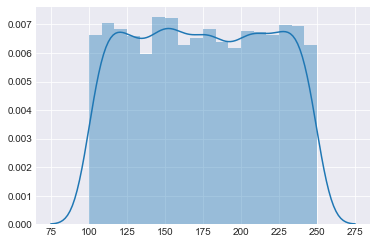

In [2]:
weights = np.random.uniform(low=100, high=250, size=5000)
print('Average weight:', np.mean(weights))
sns.distplot(weights)

Mean: 174.98601563543244, Standard Deviation: 5.922210106271363


/Users/matthew.mitchell/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


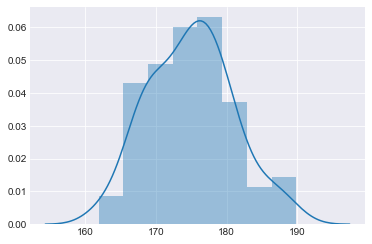

In [3]:
samples = [np.random.choice(weights, replace=False, size=50) for i in range(100)]
print('Mean: {}, Standard Deviation: {}'.format(
                                                np.mean([np.mean(i) for i in samples]),
                                                np.std([np.mean(i) for i in samples])
                                            )
     )
sns.distplot([np.mean(i) for i in samples])

/Users/matthew.mitchell/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Mean: 174.84544172987222, Standard Deviation: 6.106798781794802
Warning! This cell took: 0:01:40.783702 to execute. Rerunning will take a similar length of time.


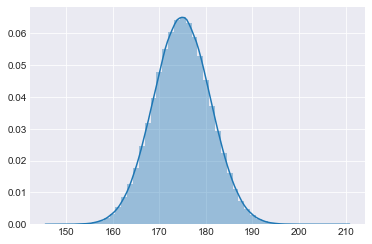

In [4]:
import datetime
start = datetime.datetime.now()
samples2 = [np.random.choice(weights, replace=False, size=50) for i in range(10**6)]
sns.distplot([np.mean(i) for i in samples2])
finish = datetime.datetime.now()
print('Mean: {}, Standard Deviation: {}'.format(
                                                np.mean([np.mean(i) for i in samples2]),
                                                np.std([np.mean(i) for i in samples2])
                                            )
     )
print('Warning! This cell took: {} to execute. Rerunning will take a similar length of time.'.format(finish-start))

## Discussion Questions

* What do these simulations demonstrate?
* How can we start to quantify the accuracy of our sample means to the true underlying population mean?


## Discussion Notes


* What do these simulations demonstrate?
    > These simulations demonstrate one application of the central limit theorem: the sample means from an underlying population will be normally distributed and centered on the underlying population mean.

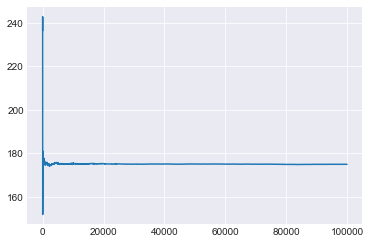

In [5]:
growing_sample = []
running_avg = []
for i in range(10**5):
    growing_sample.append(np.random.choice(weights))
    running_avg.append(np.mean(growing_sample))
plt.plot(list(range(10**5)), running_avg)
plt.plot(np.mean(weights), c='red')

## Confidence Intervals

With all of this, we can begin to quantify our certainty of the underlying population parameters as confidence intervals. Typically, this is done with a T-test to account for the heavier tails associated with smaller sample sizes.

Calculate the threshold values for a 95% confidence interval for the sample below.

In [6]:
sample = np.random.choice(weights, replace=False, size=30)

In [7]:
import scipy.stats as stats

stats.t.interval(alpha = 0.95,                  # Confidence level
                 df= len(sample)-1,             # Degrees of freedom
                 loc = np.mean(sample),         # Sample mean
                 scale = np.std(sample))        # Standard deviation estimate

(84.36488957266256, 252.3533408002437)

Calculate the threshold values for a 99% confidence interval.

In [8]:
stats.t.interval(alpha = 0.99,                  # Confidence level
                 df= len(sample)-1,             # Degrees of freedom
                 loc = np.mean(sample),         # Sample mean
                 scale = np.std(sample))        # Standard deviation estimate

(55.158868768092205, 281.55936160481406)

Generate new 20 samples (of equal size), and calculate the confidence interval for each of these. Plot these confidence intervals along with the true underlying population mean.

Text(0.5,1,'Confidence Intrevals versus Underlying Population Mean for 95% confidence')

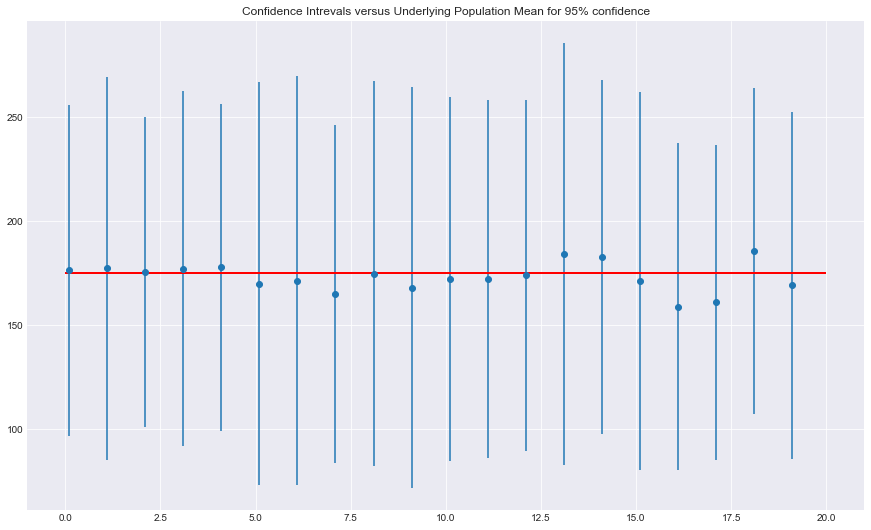

In [9]:
# Initialize lists to store interval and mean values
intervals = []
sample_means = []

# Run a for loop for sampling 20 times and calculate + store confidence interval and sample mean values in lists initialised above
sample_size = 30
for sample in range(20):
    # Take a random sample of chosen size 
    sample = np.random.choice(a= weights, size = sample_size, replace=False)
    
    confidence_interval = stats.t.interval(alpha = 0.95,
                                           df= len(sample)-1,
                                           loc = np.mean(sample),
                                           scale = np.std(sample))

    # Calculate the sample mean 
    sample_mean = sample.mean()
    
    # Calculate and append sample means and conf intervals for each iteration
    sample_means.append(sample_mean)
    intervals.append(confidence_interval)

# Plot the confidence intervals with sample and population means
plt.figure(figsize=(15,9))

# Draw the mean and confidence interval for each sample
plt.errorbar(x=np.arange(0.1, 20, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

# Draw the population mean 
plt.hlines(xmin=0, xmax=20,
           y=weights.mean(), 
           linewidth=2.0,
           color="red")

plt.title('Confidence Intrevals versus Underlying Population Mean for 95% confidence')

How would you calculate the probability that all 20 confidence intervals including the actual population mean? Explain.

In [10]:
.95**20

0.3584859224085419

By definition, we've defined our confidence intervals to have a 95% chance of including the true population parameter. As such, the probability that all 20 confidence intervals do include the actual paramter mean is $.95^{20} \approx .3585$.

## Summary

The central limit theorem allows us to quantify our belief in estimating population parameters from a given sample. The means of repeated samples, for example, will follow a normal distribution. When using small sample sizes (n < 30), it is more appropriate to use the T-distribution, which has heavier tails then the normal distribution when the degrees of freedom is low. The appropriate T-distribution to model a sample will have degrees of freedom equal to the number of samples minus 1. (degrees of freedome = number of samples - 1).